# Sicpy

In [2]:
import numpy as np
import math
import pandas as pd

In [3]:
np.nan

nan

In [7]:
np.datetime64('NaT')

numpy.datetime64('NaT')

In [4]:
# El valor no es el mismo (consideremos los desconocidos)
a = np.nan
b = np.nan

In [5]:
#No es un None
type(a)

float

In [ ]:
print(a,b)

nan nan


In [ ]:
a == b

False

In [ ]:
#df[df.columna == np.nan]
#df[df.columna.isnul()]
#df[df.columna.isna()]

In [ ]:
a is b

True

In [ ]:
print(id(a), id(b))

140717808812848 140717808812848


In [ ]:
f = 3+1
g = 4
print(id(f), id(g))

10914592 10914592


In [11]:
c = math.nan
d = math.nan
print( c == d)
print(id(c), id(d))

False
140664832533488 140664832533488


In [ ]:
c is a

False

In [12]:
q = float('nan')
w = float('nan')
print(id(q), id(w))

140664127419664 140664127418960


In [ ]:
print(pd.isnull(a), pd.isnull(c), pd.isnull(q))

True True True


In [16]:
np.isnan(a)

True

In [14]:
math.isnan(q)

True

In [18]:
import statistics
import scipy
import scipy.stats

In [19]:
x = [1,2,3,4,5,6]
x_nan = [1,2,3,np.nan,5,6]

In [20]:
arr = np.array(x)
arr_nan = np.array(x_nan)

In [21]:
ser = pd.Series(x)
ser_nan = pd.Series(x_nan)

In [22]:
arr_nan

array([ 1.,  2.,  3., nan,  5.,  6.])

In [23]:
ser_nan

0    1.0
1    2.0
2    3.0
3    NaN
4    5.0
5    6.0
dtype: float64

In [24]:
# Estamos juntandos todas las estructuras de datos en un diccionaro para poder
# iterarlas de forma limpia
todos = {'lista':x, 'lista_nan':x_nan, 'array':arr, 'array_nan':arr_nan,
         'serie':ser, 'serie_nan':ser_nan}

In [25]:
for key, val in todos.items():
  print(key)
  print(sum(val)/len(val))

lista
3.5
lista_nan
nan
array
3.5
array_nan
nan
serie
3.5
serie_nan
nan


In [26]:
# La suma de valores si tiene un nan resulta en nan
sum(x_nan)/3

nan

In [27]:
# Statistics.mean si tiene un np.array de enteros corta el resultado a un entero
for key, val in todos.items():
  print(key)
  print(statistics.mean(val))

lista
3.5
lista_nan
nan
array
3
array_nan
nan
serie
3.5
serie_nan
nan


In [28]:
int(sum(arr)/6)

3

In [29]:
# Desde python 3.8, trabaja siempre con floats y es mas rapido
statistics.fmean(array)

AttributeError: ignored

In [30]:
# np.mean ignora los nulos de las series
for key, val in todos.items():
  print(key)
  print(np.mean(val))

lista
3.5
lista_nan
nan
array
3.5
array_nan
nan
serie
3.5
serie_nan
3.4


In [31]:
ser_nan

0    1.0
1    2.0
2    3.0
3    NaN
4    5.0
5    6.0
dtype: float64

In [32]:
sum([1,2,3,5,6])/5

3.4

In [33]:
# scipy.mean es equivalente a np.mean y se dejara de usar en un futuro
for key, val in todos.items():
  print(key)
  print(scipy.mean(val))

lista
3.5
lista_nan
nan
array
3.5
array_nan
nan
serie
3.5
serie_nan
3.4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  after removing the cwd from sys.path.


In [34]:
# np.nanmean ignora los nulos y regresa el resultado bien
for key, val in todos.items():
  print(key)
  print(np.nanmean(val))

lista
3.5
lista_nan
3.4
array
3.5
array_nan
3.4
serie
3.5
serie_nan
3.4


In [35]:
ser.mean()

3.5

In [38]:
# Si le decimos skipna=False entonces si se toma un nulo regresa nan,
# el parametro es True por default
ser_nan.mean(skipna=False)

nan

In [ ]:
# Calcular mediana de algun iterable
def mediana_python(objeto):
  # Obtener el tamaño primero
  n = len(objeto)

  # Si es impar entonces basta con traer el elemento que se encuentra en medio
  
  # Recordemos que n%2 es lo mismo que n%2==1 quiere decir que al dividir
  # n entre 2 sobra 1 es decir que es impar
  
  if n % 2:
    # Primero ordenamos los datos y agarramos el de enmedio
  
    # ej: si teniamos 11 datos nos interesa el dato 6 lo cual corresponde
    # al indice 5 = (11-1)*0.5
  
    # El round es para convertirlo a int
    mediana = sorted(objeto)[round(0.5*(n-1))]
  else:
    # En caso de que tengamos un numero par de elementos vamos a sacar el 
    # promedio de los dos que queden en medio
  
    # Vamos a guardar en ob_ord los elementos ya ordenados de menor a mayor
  
    # Y guardamos en ind, el indice que corresponde a la mitad, como en este
    # caso es par no se le resta 1, si tuvieramos 12 elementos por ejemplo
    # ind seria igual a 6 que corresponde al elemento 7.
  
    # Como queremos el promedio de los elementos de en medio, siguiendo el 
    # ejemplo donde tenemos 2 justo la mitad serian el 6 7 y por eso como ind
    # ya trae el elemento 7 faltaria el otro y entonces a ese corresponde
    # ind-1
    ob_ord, ind = sorted(objeto), round(0.5*n)

    #Sacamos el promedio de ambos
    mediana = 0.5 * (ob_ord[ind - 1] + ob_ord[ind])
  return mediana

In [ ]:
# Los nans son porque justo np.nan esta en medio
for key, val in todos.items():
  print(key)
  print(mediana_python(val))

lista
3.5
lista_nan
nan
array
3.5
array_nan
nan
serie
3.5
serie_nan
nan


In [ ]:
# nan lo toma como elemento cualquiera y a la mitad quedan 2 y 3
mediana_python([np.nan,1,2,3,4,5])

2.5

In [ ]:
arr_nan

array([ 1.,  2.,  3., nan,  5.,  6.])

In [ ]:
for key, val in todos.items():
  print(key)
  print(statistics.median(val))

lista
3.5
lista_nan
nan
array
3.5
array_nan
nan
serie
3.5
serie_nan
nan


In [ ]:
# Igual que arriba
statistics.median([np.nan, 1, 2, 3, 4, 5])

2.5

In [ ]:
for key, val in todos.items():
  print(key)
  print(np.median(val))

lista
3.5
lista_nan
nan
array
3.5
array_nan
nan
serie
3.5
serie_nan
nan


In [ ]:
# No importa donde este nuestro nan si encuentra uno regresa nan
np.median([np.nan, 1, 2, 3, 4, 5])

nan

In [ ]:
# Hace como si el nan no existiera
for key, val in todos.items():
  print(key)
  print(np.nanmedian(val))

lista
3.5
lista_nan
3.0
array
3.5
array_nan
3.0
serie
3.5
serie_nan
3.0


In [ ]:
ser_nan

0    1.0
1    2.0
2    3.0
3    NaN
4    5.0
5    6.0
dtype: float64

In [ ]:
# Igual que .mean() se puede pasar skipna, si es False y encuentra
# un nan entonces regresa nan, si no regresa la mediana
ser.median(skipna= False)

3.5

In [ ]:
ser_nan.median(skipna=False)

nan

In [ ]:
u = [1,2,3,1,6,1,7,1,54]
v = [1,2,1,2,1,2,6,2,6,1,98,345]

In [ ]:
# Estamos guardando tuplas de la forma 
# (cuantas veces esta el elemento, elemento) para cada elemento en u
[(u.count(item),item) for item in set(u)]

[(4, 1), (1, 2), (1, 3), (1, 6), (1, 7), (1, 54)]

In [ ]:
# El maximo busca la que tenga el valor mas grande en el primer indice de la
# tupla, si hubiera dos iguales se pasa a comparar el segundo indice
# (ese caso sale mas abajo)
max((u.count(item),item) for item in set(u))

(4, 1)

In [ ]:
statistics.mode(u)

1

In [ ]:
# Trae la moda y las repeticiones
scipy.stats.mode(u)

ModeResult(mode=array([1]), count=array([4]))

In [ ]:
# Aqui tenemos (4,1) y (4,2) entonces como el 4 es igual para los dos
# compara 1 y 2 por eso regresa (4,2)
max((v.count(item),item) for item in set(v))

(4, 2)

In [ ]:
statistics.mode(v)

StatisticsError: ignored

In [ ]:
# Al contrario de la de arriba se trae la mas chica
scipy.stats.mode(v)

ModeResult(mode=array([1]), count=array([4]))

In [ ]:
j = [2, np.nan, np.nan]
max((j.count(item),item) for item in set(j))

(2, nan)

In [ ]:
statistics.mode(j)

nan

In [ ]:
# scipy no considera np.nan para la moda
scipy.stats.mode(j)

ModeResult(mode=array([2.]), count=array([1]))

In [ ]:
# Pandas tambien ignora NaN y te regresa todas las modas, no solo 1
u,v,j = pd.Series(u), pd.Series(v), pd.Series(j)

In [ ]:
u.mode()

0    1
dtype: int64

In [ ]:
v.mode()

0    1
1    2
dtype: int64

In [ ]:
j.mode()

0    2.0
dtype: float64

In [ ]:
j

0    2.0
1    NaN
2    NaN
dtype: float64

## Special submodule

In [ ]:
from scipy.special import comb, perm

In [ ]:
# Cuantas formas tengo de agarrar 3 numeros en un conjunto de 10 sin repetir
# ninguno y donde el orden importa
# n!/(n-k)!
#(1,2,3)!=(1,3,2)!=(3,1,2)
perm(10,3)

720.0

In [ ]:
# De cuantas formas se puede ordenar mi conjunto
# n!/(n-n)! = n!/0! = n!
perm(10,10)

3628800.0

In [ ]:
# Cuantas formas tengo agarrar 3 numeros de un conjunto de 10
# se pueden repetir los numeros donde el orden no importa
# (n+k-1)!/k!(n-k)!
comb(10, 3, repetition= True)

220.0

In [ ]:
# [1,2,3,4,5,6,7,8,9,10]
# (1,1,2) (1,4,5) (3,3,3) (10,2,5)
# (1,1,2) = (1,2,1)

In [ ]:
# Cuantas formas tengo agarrar 3 numeros de un conjunto de 10
# no se pueden repetir los numeros donde el orden no importa
# n!/k!(n-k)!
# Default repetition = False
comb(10, 3)

120.0

In [ ]:
from scipy import special
#import scipy.special as special

In [ ]:
# 10^2
special.exp10(2)

100.0

In [ ]:
# 2^5
special.exp2(5)

32.0

In [ ]:
# 2^2 = 4, 2^5=32, 2^1=2
special.exp2([2,5,1])

array([ 4., 32.,  2.])

In [ ]:
# cubic root
special.cbrt([8, -8, 27])

array([ 2., -2.,  3.])

In [ ]:
# Seno del angulo en grados
special.sindg(30)

0.49999999999999994

In [ ]:
# coseno del angulo en grados
# sqrt(3)/2
special.cosdg(30)

0.8660254037844387

In [ ]:
special.cosdg(90)

-0.0

In [ ]:
# 90° = 0.5 pi radianes
special.radian(90,0,0)/scipy.pi

0.5

In [ ]:
scipy.pi/2

1.5707963267948966

## Stats

In [43]:
from scipy import stats

In [44]:
x = [1,2,3,4,5,6]

In [45]:
# Info de tus datos, nobs es numero de observaciones, minimo y maximo en minmax
stats.describe(x)

DescribeResult(nobs=6, minmax=(1, 6), mean=3.5, variance=3.5, skewness=0.0, kurtosis=-1.2685714285714282)

In [46]:
# Crea variable aleatoria normal lleva parametros media y stdev
# stdev = sqrt(var)
# Default = N(0,1) = stats.norm(0,1)
normal = stats.norm()

In [47]:
# Esperanza es a lo que tiene el promedio de tus muestras
normal.expect()

0.0

In [48]:
# Intervalo de confianza con conf del 0.95
# probabilidad de que caiga en las colas = 1-0.95=.05
normal.interval(0.95)

(-1.959963984540054, 1.959963984540054)

In [49]:
# proba de 0.05 cae en
#(-infinity, -1.9599...) union (1.9595562,infity)

In [50]:
# probability density function
# no es la probabilidad de que el dato sea 0
normal.pdf(0)

0.3989422804014327

In [51]:
# probabilidad acumulada
# probabilidad de que un dato sea menor o igual que 0
normal.cdf(0)

0.5

In [52]:
import matplotlib.pyplot as plt

In [53]:
x = np.arange(-3,3.1,0.1)

In [54]:
x

array([-3.00000000e+00, -2.90000000e+00, -2.80000000e+00, -2.70000000e+00,
       -2.60000000e+00, -2.50000000e+00, -2.40000000e+00, -2.30000000e+00,
       -2.20000000e+00, -2.10000000e+00, -2.00000000e+00, -1.90000000e+00,
       -1.80000000e+00, -1.70000000e+00, -1.60000000e+00, -1.50000000e+00,
       -1.40000000e+00, -1.30000000e+00, -1.20000000e+00, -1.10000000e+00,
       -1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01,  2.66453526e-15,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01,
        1.00000000e+00,  1.10000000e+00,  1.20000000e+00,  1.30000000e+00,
        1.40000000e+00,  1.50000000e+00,  1.60000000e+00,  1.70000000e+00,
        1.80000000e+00,  1.90000000e+00,  2.00000000e+00,  2.10000000e+00,
        2.20000000e+00,  

In [56]:
#list(zip(x,normal.pdf(x)))

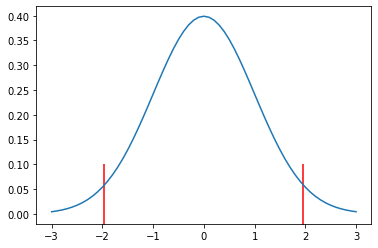

In [57]:
# Agrege los puntos para marcar intervalos de confianza donde se espera que 
# caigan el 95% de los datos
plt.figure(facecolor='w')
plt.plot(x,normal.pdf(x))
plt.scatter(normal.interval(0.95),(0,0), marker='|', s=10000, c='r')

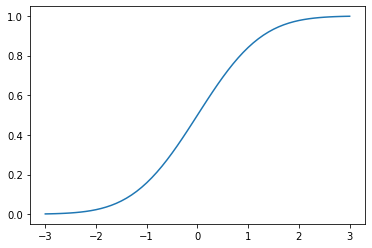

In [ ]:
plt.figure(facecolor='w')
plt.plot(x,normal.cdf(x))

In [59]:
#normal.cdf(35)
# proba de que sea mayor de 60 = 1-normal.cdf(60)= 1 - proba menor de 60

In [ ]:
# Muestra de esa distribucion normal
normal.rvs(10)

array([ 1.06544339, -0.89052776, -0.19369932,  0.21736881, -0.34920363,
       -0.27440506,  1.04083236, -0.60321509,  0.29831905, -0.29154821])

In [ ]:
# Distribución binomial (pertenece a las discretas)
# Ej: lanzar una moneda 10 veces y contar el numero de aguilas
binomial = stats.binom(10,0.5)

In [ ]:
# Si verias personas lanzan 10 monedas y saco el promedio
# de las aguilas que le saliaeron a cada quien, que promedio espero?

# La esperanza podria no ser un entero, es decir no necesariamente
# es el numero de aguilas que esperamos obtener
binomial.expect()

5.000000000000005

In [ ]:
# Numero de resultados positivos caen en el intervalo con confianza de 0.95
# Es decir con proba de 0.95 si lanzo 10 monedas el numero de aguilas debe
# estar entre 2 y 8
binomial.interval(0.95)

(2.0, 8.0)

In [ ]:
# probability mass function
# proba de sacar exactamente 5 aguilas
binomial.pmf(5)

0.24609375000000025

In [ ]:
# probabilidad de que salgan maximo 5 aguilas
# binomial.cdf(5) = binomial.pmf(0) + binomial.pdf(1)+... bonimial.pdf(5)
binomial.cdf(5)

0.6230468749999999

In [ ]:
# Comprobando la ecuacion de arriba
sum(binomial.pmf(x) for x in range(6))

0.6230468750000006

In [ ]:
x = np.arange(0,11,1)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

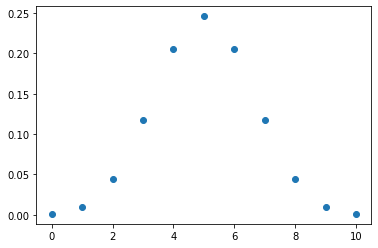

In [ ]:
plt.figure(facecolor='w')
plt.scatter(x,binomial.pmf(x))

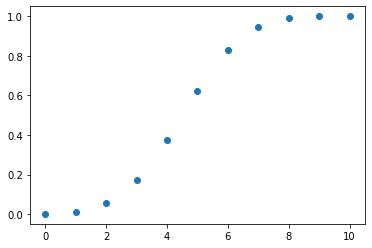

In [ ]:
plt.figure(facecolor='w')
plt.scatter(x,binomial.cdf(x))

In [ ]:
# Numero de experimentos es muy grande la binomial se parece a una normal
binomgr = stats.binom(10000,0.5)

In [ ]:
x=np.arange(4700,5300,1)

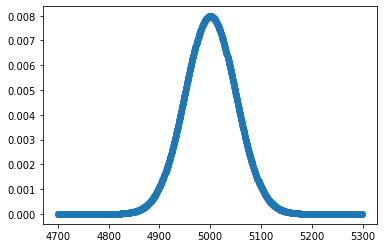

In [ ]:
plt.figure(facecolor='w')
plt.scatter(x,binomgr.pmf(x))

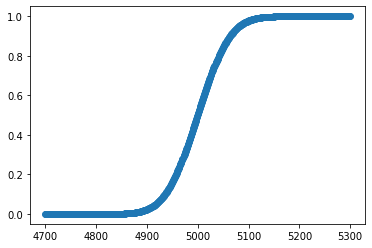

In [ ]:
plt.figure(facecolor='w')
plt.scatter(x,binomgr.cdf(x))

In [ ]:
binomial.rvs(10)

array([5, 5, 4, 7, 4, 3, 6, 3, 5, 4])

## Linalg

In [60]:
from scipy import linalg

In [61]:
matriz_prueba = np.array([[1,3,2],[1,5,1],[1,3,5]])
matriz_prueba

array([[1, 3, 2],
       [1, 5, 1],
       [1, 3, 5]])

In [62]:
linalg.inv(matriz_prueba)

array([[ 3.66666667, -1.5       , -1.16666667],
       [-0.66666667,  0.5       ,  0.16666667],
       [-0.33333333,  0.        ,  0.33333333]])

In [63]:
# Debe ser que mat * mant_inv = mat_ind
# donde mat= matriz original
# mat_inv = inversa de la matriz original
# mat_ind = matriz identidad (1's en la diagona, 0 los demas)
np.dot(matriz_prueba,linalg.inv(matriz_prueba))

array([[ 1.00000000e+00,  0.00000000e+00,  1.11022302e-16],
       [ 5.55111512e-17,  1.00000000e+00,  5.55111512e-17],
       [-5.55111512e-17,  0.00000000e+00,  1.00000000e+00]])

In [ ]:
np.array([[1,2,3],[1,5,2]])

array([[1, 2, 3],
       [1, 5, 2]])

In [ ]:
# La matriz debe ser cuadrada
linalg.inv([[1,2,3],[1,5,2]])

ValueError: ignored

In [ ]:
# El determinante debe ser distinto de 0
linalg.inv([[1,3,2],[1,5,1],[0,0,0]])

LinAlgError: ignored

#### Ejemplo sistema de ecuaciones
4x + 5y = 2\
3x + 2y = 3

In [64]:
# Se separa el sistema en una matriz del lado izquierdo del igual
# y una del lado derecho del igual
var = [[4,5],[3,2]]
res = [2,3]

In [ ]:
np.array(var)

array([[4, 5],
       [3, 2]])

In [ ]:
np.array(res)

array([2, 3])

In [ ]:
# Solucionar regresa [variable1, variable2,..]
# que solucionan el sistema
linalg.solve(var,res)

array([ 1.57142857, -0.85714286])

## Interpolacion

In [67]:
from scipy.interpolate import interp1d

In [69]:
x = np.arange(0,11,1)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [70]:
y = np.cos(x)
y

array([ 1.        ,  0.54030231, -0.41614684, -0.9899925 , -0.65364362,
        0.28366219,  0.96017029,  0.75390225, -0.14550003, -0.91113026,
       -0.83907153])

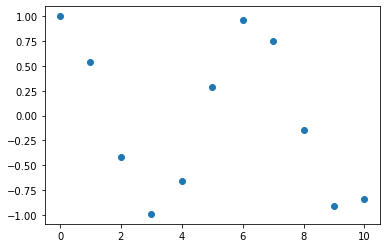

In [ ]:
plt.figure(facecolor='w')
plt.scatter(x,y)

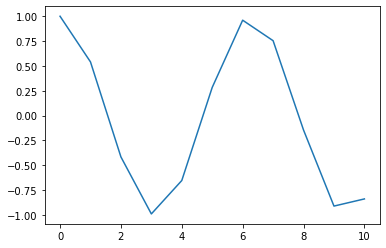

In [ ]:
plt.figure(facecolor='w')
plt.plot(x,y)

In [ ]:
# Llena datos haciendo la recta entre los observados
# extrapolate permite llenar datos afuera de mis observaciones
# (mas grandes/chicas)
# Puede aceptar kind='quadratic' u otro valor
f = interp1d(x,y, kind='linear', fill_value='extrapolate')

In [74]:
x_new = np.arange(0,14.25,0.25)

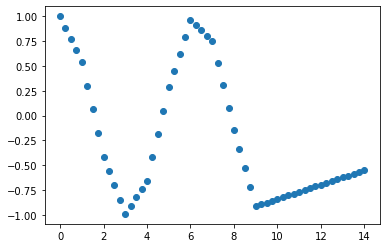

In [ ]:
plt.figure(facecolor='w')
plt.scatter(x_new,f(x_new))

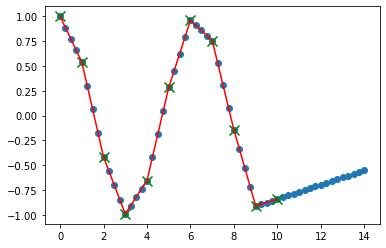

In [ ]:
# x son datos originales
# lineas rojas son las rectas que unen esos datos
# puntos azules son los nuevos que lleno
plt.figure(facecolor='w')
plt.scatter(x_new, f(x_new))
plt.scatter(x,y, s=100, marker='x', c='g')
plt.plot(x,y,c='r')
plt.show()

In [76]:
# Llena datos haciendo la recta entre los observados
# extrapolate permite llenar datos afuera de mis observaciones
# (mas grandes/chicas)
# Puede aceptar kind='quadratic' u otro valor
f = interp1d(x,y, kind='cubic', fill_value='extrapolate')

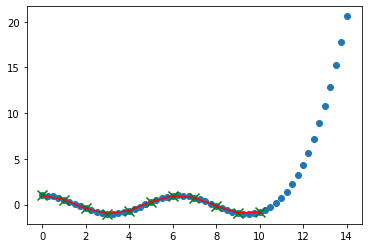

In [77]:
# x son datos originales
# lineas rojas son las rectas que unen esos datos
# puntos azules son los nuevos que lleno
plt.figure(facecolor='w')
plt.scatter(x_new, f(x_new))
plt.scatter(x,y, s=100, marker='x', c='g')
plt.plot(x,y,c='r')
plt.show()